# CAR-MODEL RECOGNITION USING DEEP CONVOLUTIONAL NEURAL NETWORK

    *************************************************************
    Author:  Adeyemi Adedoyin Simeon
    Program: MSc, Computer Science, University of Ibadan
    Course:  AI: Machine Learning
    Date:    25th May, 2019
    Version: 1.3
    E-mail:  adeyemi.sa1@gmail.com
    *************************************************************
    
    *Note: Please reference the author whenever and wherever you use all/portion of this code*

### Dataset Used:
**The dataset that was used for this project is the 'Stanford Cars Dataset' downloaded from kaggle containing 16,500 car images. Splitted into 8,144 images for training and 8,041 images as test set**

In [334]:
# importing libraries and packages

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
mat_train = loadmat('devkit/cars_train_annos.mat')
mat_test = loadmat('devkit/cars_test_annos.mat')
meta = loadmat('devkit/cars_meta.mat')

In [110]:
# Load all car model names into labels
labels = list()
for l in meta['class_names'][0]:
    labels.append(l[0])

In [111]:
labels[:2]

['AM General Hummer SUV 2000', 'Acura RL Sedan 2012']

In [112]:
# Loading the Training set data
train = list()
for example in mat_train['annotations'][0]:
    label = labels[example[-2][0][0]-1]
    image = example[-1][0]
    train.append((image,label))

In [113]:
train[:2]

[('00001.jpg', 'Audi TTS Coupe 2012'), ('00002.jpg', 'Acura TL Sedan 2012')]

In [114]:
# Loading the test set data
test = list()
for example in mat_test['annotations'][0]:
    image = example[-1][0]
    test.append(image)

In [115]:
test[:2]

['00001.jpg', '00002.jpg']

In [116]:
train = pd.DataFrame(data=train, columns=['ImageName','Label'])
test = pd.DataFrame(data=test, columns=['ImageName'])

In [117]:
my_train_copy = train

In [118]:
train.count()

ImageName    8144
Label        8144
dtype: int64

In [119]:
test.count()

ImageName    8041
dtype: int64

In [120]:
print(len(train) + len(test))

16185


In [121]:
#Google cloud example
#bucket_path = 'gs://example'
#with open('data/cars_data.csv', 'w+') as f:
#    [f.write('TRAIN,%s%s,%s\n' %(bucket_path,img,lab)) for img,lab in train]
#    [f.write('VALIDATION,%s%s,%s\n' %(bucket_path,img,lab)) for img,lab in validation]
#    [f.write('TEST,%s%s\n' %(bucket_path,img)) for img,_ in test]

In [122]:
X  = train.Label.apply(lambda lbl: lbl.split(' '))

In [123]:
manufacturer,model,tag_name,year = X.apply(lambda lbl: lbl[0]),X.apply(lambda lbl: lbl[1]),X.apply(lambda lbl: lbl[2]),X.apply(lambda lbl: lbl[-1])

In [124]:
cars = list(zip(manufacturer,model,tag_name,year))

In [125]:
cars = pd.DataFrame(cars,columns=['manufacturer','model','tag_name','year'])

In [126]:
train = pd.concat([train,cars],axis=1)

In [127]:
train.drop('Label',axis=1,inplace=True)

In [128]:
train.head()

,ImageName,manufacturer,model,tag_name,year
0,00001.jpg,Audi,TTS,Coupe,2012
1,00002.jpg,Acura,TL,Sedan,2012
2,00003.jpg,Dodge,Dakota,Club,2007
3,00004.jpg,Hyundai,Sonata,Hybrid,2012
4,00005.jpg,Ford,F-450,Super,2012


In [130]:
train.manufacturer.unique()

array(['Audi', 'Acura', 'Dodge', 'Hyundai', 'Ford', 'Geo', 'Mitsubishi',
       'Chevrolet', 'Buick', 'Toyota', 'Volvo', 'Plymouth', 'Volkswagen',
       'Chrysler', 'BMW', 'GMC', 'Nissan', 'Suzuki', 'Spyker', 'Land',
       'Ferrari', 'Fisker', 'Infiniti', 'Rolls-Royce', 'Porsche',
       'Bentley', 'Jeep', 'Cadillac', 'HUMMER', 'Aston', 'Honda',
       'Mercedes-Benz', 'Jaguar', 'Isuzu', 'Scion', 'Ram', 'AM',
       'McLaren', 'Bugatti', 'smart', 'FIAT', 'Lamborghini', 'Tesla',
       'Lincoln', 'Maybach', 'Mazda', 'Eagle', 'Daewoo', 'MINI'],
      dtype=object)

In [131]:
import os, shutil
def copyFile(src_file_path,dst_folder):
    return shutil.copy(src_file_path, dst_folder)

In [132]:
# Sample copy of file
# import shutil
# shutil.copy('E:\\FILMS\\'+'VID-20171108-WA0000.mp4','C:\\Users\\SIMEON_DEE\\Pictures\\JP')

## Version 1: Function below Creates folder for all cars by one car manufacturer

In [133]:
successfully_copied = list()
def createFolderAndCopyPictures(src_base_path, dest_base_path, dataframe):
    try:
        for manu_name in dataframe.manufacturer.unique():
            dest_folder = dest_base_path + '\\' + manu_name
            os.makedirs(dest_folder)
            for img in dataframe[dataframe.manufacturer == manu_name]['ImageName']:
                destination = shutil.copy(src_base_path + '\\' + img, dest_folder)
                successfully_copied.append(destination)
    
    except OSError:  
        print ("Creation of the directory %s failed" % dest_folder)
    else:  
        print ("Successfully created the directory %s " % dest_folder)

## Version 2: Function below Creates A folder for all cars of the same specific model (BEST!)

In [134]:
successfully_copied = list()
def latestCreateFolderWithSubfolders(src_base_path, dest_base_path, dataframe):
    try:
        for manu_name in dataframe.manufacturer.unique():
            for model in dataframe[dataframe.manufacturer == manu_name]['model'].unique():
                for tag in dataframe[(dataframe.manufacturer == manu_name) & (dataframe.model == model)]['tag_name'].unique():
                    for year in dataframe[(dataframe.manufacturer == manu_name) & (dataframe.model == model) & (dataframe.tag_name == tag)]['year'].unique():
                        dest_folder = dest_base_path + '\\' + manu_name + ' ' + model + ' ' + tag + ' ' + year
                        
                        #create the foler
                        os.makedirs(dest_folder)
                        
                        # Get all the images for a given manufacturer => model => tag => year and save them
                        for img in dataframe[(dataframe.manufacturer == manu_name) & (dataframe.model == model) & (dataframe.tag_name == tag) & 
                                    (dataframe.year == year)]['ImageName']:                  
                                
                            #Copy all the Images into the created folder
                            destination = copyFile(src_base_path+'\\'+img, dest_folder)
                            successfully_copied.append(destination)
                            
    except OSError:  
        print ("Creation of the directory %s failed" % dest_folder)
    else:  
        print ("Successfully created the directory %s " % dest_folder)
                            

## Version 3: Function below Creates A folder for all cars of the same specific model (NEW BEST!)

In [135]:
successfully_copied = list()
def mergePicturesIntoFolders(src_base_path, dest_base_path, dataframe):
    try:
        for car_label in dataframe.Label.unique():
            dest_folder = dest_base_path + '\\' + car_label
            os.makedirs(dest_folder)
            for img in dataframe[dataframe.Label == car_label]['ImageName']:
                destination = shutil.copy(src_base_path + '\\' + img, dest_folder)
                successfully_copied.append(destination)
    
    except OSError:  
        print ("Creation of the directory %s failed" % dest_folder)
    else:  
        print ("Successfully created the directory %s " % dest_folder)

# -------------------------------------------------------------------------------------------------

# SPlitting into Training,Validation and Test Sets 

In [177]:
my_train_copy.Label = my_train_copy.Label.apply(lambda x: x.split(' ')[0])
train_size = int(len(my_train_copy) * 0.8)
test_size = int(len(my_train_copy) * 0.15)

# train_set, validate_set and test_set are 60%, 20%,20% respectively
train_set = my_train_copy[:train_size]
validate_set = my_train_copy[train_size:-test_size]
test_set = my_train_copy[-test_size:]

## Creating folders for the splitted Training Image Set

In [178]:
picture_source_path = 'C:\\Users\\SIMEON_DEE\\Datasets\\cars_train\\cars_train'
picture_dest_base_path = 'C:\\Users\\SIMEON_DEE\\Datasets\\StanfordCarsGrouped6\\training_set'
#training_set = pd.concat([X_train,y_train],axis=1)
mergePicturesIntoFolders(picture_source_path, picture_dest_base_path, train_set)

Successfully created the directory C:\Users\SIMEON_DEE\Datasets\StanfordCarsGrouped6\training_set\MINI 


## Creating folders for the splitted Validation Image Set

In [179]:
picture_source_path = 'Datasets/cars_train/cars_train'
picture_dest_base_path = 'Datasets/StanfordCarsGrouped6/validation_set'
#testing_set = pd.concat([X_test,y_test],axis=1)
mergePicturesIntoFolders(picture_source_path, picture_dest_base_path, validate_set)

Successfully created the directory C:\Users\SIMEON_DEE\Datasets\StanfordCarsGrouped6\validation_set\Land 


## Creating folders for the splitted Test Image Set

In [180]:
picture_source_path = 'Datasets/cars_train/cars_train'
picture_dest_base_path = 'Datasets/StanfordCarsGrouped6/testing_set'
#testing_set = pd.concat([X_test,y_test],axis=1)
mergePicturesIntoFolders(picture_source_path, picture_dest_base_path, test_set)

Successfully created the directory C:\Users\SIMEON_DEE\Datasets\StanfordCarsGrouped6\testing_set\Plymouth 


# ==================================================
# CNN CODES BEGINS FROM HERE
# ==================================================

In [181]:
# importing keras libraries and packages

In [182]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [236]:
# Initializing the CNN
cnn_classifier = Sequential()

In [237]:
# Step 1: Adding the Convolution Layer
cnn_classifier.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))

# Step 2: Adding the Maxpooling Layer
cnn_classifier.add(MaxPooling2D(pool_size=(2,2)))


# CONVOLUTION LAYER TWO (for better performance)
# Adding the second Convolution Layer
cnn_classifier.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))

# Maxpooling the second Convolution Layer
cnn_classifier.add(MaxPooling2D(pool_size=(2,2)))



# Step 3: Adding the Flattening Layer
cnn_classifier.add(Flatten())

#  Adding the Fully Connected Deep ANN Layers 

In [238]:
# Adding the input and first hidden layer of the ANN
cnn_classifier.add(Dense(units=128, activation='relu'))

# ANN Hidden Layer 2
cnn_classifier.add(Dense(units=128, activation='relu'))

In [239]:
# Adding the output layer of the ANN
cnn_classifier.add(Dense(units=17, activation='softmax'))

In [240]:
cnn_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Image Preprocessing - Augmentation (Generation)

In [241]:
from keras.preprocessing.image import ImageDataGenerator

In [242]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [243]:
# Generating the training and test data sets
# NOTE: 'target_size' should match the 'input_shape' of the convolution layer
training_set_aug_images = train_datagen.flow_from_directory(
                                            'Datasets/StanfordCarsGroup/sub_training_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')

validation_set_aug_images = validation_datagen.flow_from_directory(
                                            'Datasets/StanfordCarsGroup/sub_validation_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')

testing_set_aug_images = test_datagen.flow_from_directory(
                                            'Datasets/StanfordCarsGroup/sub_testing_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')


Found 4012 images belonging to 17 classes.
Found 275 images belonging to 17 classes.
Found 734 images belonging to 17 classes.


In [244]:
len(testing_set_aug_images.labels)

734

## Note: 
* I used a small size of epochs (5) because i used a CPU and this actually took up to 6 hours
* For improved predictive accuracy, the number of epochs should be set to around (100 to 150) so the model can learn more
* Use a GPU System


In [245]:
# Fitting The cnn model with the training set
cnn_classifier.fit_generator(
                        generator=training_set_aug_images,
                        steps_per_epoch=len(training_set_aug_images.labels),
                        epochs=5,
                        validation_data=testing_set_aug_images,
                        validation_steps=len(testing_set_aug_images.labels))

Epoch 1/5
4012/4012 [==============================] - 2571s 641ms/step - loss: 1.6320 - acc: 0.4701 - val_loss: 4.1530 - val_acc: 0.2316
Epoch 2/5
4012/4012 [==============================] - 11985s 3s/step - loss: 0.5003 - acc: 0.8368 - val_loss: 5.3464 - val_acc: 0.2381
Epoch 3/5
4012/4012 [==============================] - 7544s 2s/step - loss: 0.2631 - acc: 0.9138 - val_loss: 6.5921 - val_acc: 0.2438
Epoch 4/5
4012/4012 [==============================] - 2468s 615ms/step - loss: 0.1958 - acc: 0.9370 - val_loss: 6.6906 - val_acc: 0.2576
Epoch 5/5
4012/4012 [==============================] - 2404s 599ms/step - loss: 0.1591 - acc: 0.9494 - val_loss: 7.3949 - val_acc: 0.2330


In [249]:
scores = cnn_classifier.evaluate_generator(generator=validation_set_aug_images,
                                           steps=len(validation_set_aug_images.labels),verbose=2)

In [335]:
# NOTE: We only use 5 epochs during the training because of our limited CPU performance limitation. We are confident 
# that the model will perform more excellently with more epochs on a GPU.

# Also, due to the same device constraint, we could only train the model on a subset of the dataset. We hope to 
# improve the model later when we gain access to online GPU-based Cloud Computing facility.

In [341]:
# Details of the Training
model_training_info = pd.DataFrame(cnn_classifier.history.history)

In [342]:
model_training_info

,val_loss,val_acc,loss,acc
0,4.153013,0.231580,1.631998,0.470093
1,5.346350,0.238132,0.500158,0.836838
2,6.592051,0.243767,0.263124,0.913781
3,6.690631,0.257642,0.195541,0.937015
4,7.394887,0.233009,0.158834,0.949477


## Model Evaluation: Accuracy

In [351]:
print('The accuracy after 5 epochs = ', np.round(model_training_info.iloc[-1]['acc'] * 100, 0), '%.' )

The accuracy after 5 epochs =  95.0 %.


## Visualizations the Model

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

In [372]:
#SVG(data=model_to_dot(cnn_classifier).create(prog='dot',format='svg'))

In [371]:
# plot_model(model=cnn_classifier,to_file='cnn_classifier_model.png')

Text(0,0.5,'Accuracy')

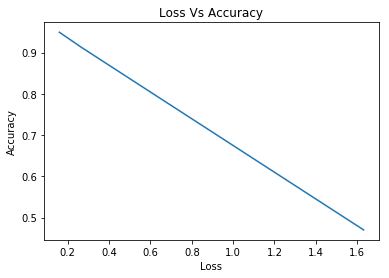

In [357]:
plt.plot(model_training_info.loss, model_training_info.acc)
plt.title('Loss Vs Accuracy')
plt.xlabel('Loss')
plt.ylabel('Accuracy')

# SAVING THE TRAINED MODEL

In [253]:
cnn_classifier.save('my_model.h5')

# How to get the image label classes

In [260]:
classes = training_set_aug_images.class_indices
print(classes)

{'Acura': 0, 'Audi': 1, 'BMW': 2, 'Bentley': 3, 'Bugatti': 4, 'Chevrolet': 5, 'Ferrari': 6, 'Ford': 7, 'Honda': 8, 'Hyundai': 9, 'Jeep': 10, 'Lamborghini': 11, 'Mazda': 12, 'Mercedes-Benz': 13, 'Nissan': 14, 'Toyota': 15, 'Volvo': 16}


In [270]:
print(classes.keys())
for i,key in enumerate(classes):
    print(i,key)

dict_keys(['Acura', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Chevrolet', 'Ferrari', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Lamborghini', 'Mazda', 'Mercedes-Benz', 'Nissan', 'Toyota', 'Volvo'])
0 Acura
1 Audi
2 BMW
3 Bentley
4 Bugatti
5 Chevrolet
6 Ferrari
7 Ford
8 Honda
9 Hyundai
10 Jeep
11 Lamborghini
12 Mazda
13 Mercedes-Benz
14 Nissan
15 Toyota
16 Volvo


# ---------------------------------------------------------------------------------------------------------
# USING THE TRAINED MODEL THAT HAS BEEN SAVED FOR PREDICTION
# ----------------------------------------------------------------------------------------------------------

# Test the trained model with the validation/test image set

In [271]:
# Importing libraries

In [5]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
def load_image(img_path, show=False):
    img = image.load_img(img_path,target_size=(64,64),color_mode='rgb')
    
    #(height,width,channels)
    img_tensor = image.img_to_array(img)                                        
    
    #img_tensor = np.vstack([img_tensor])
    
    #(1,height,width,channels), adds a dim coz model expects shape: (batch_size,height,width,channels)
    img_tensor = np.expand_dims(img_tensor,axis=0)     
    
    #imshow expects values in range[0,1]
    img_tensor = img_tensor / 255.
    
    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()
    
    return img_tensor

## Loading the saved trained model

In [7]:
saved_cnn_model = load_model('my_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
saved_cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
# Getting the Image to predict
img_path = 'Datasets/StanfordCarsGroup/sub_validation_set/Bentley/06520.jpg'     #Bentley car
new_image = load_image(img_path)

# ---------------------------------------------
# RESULTS AND PREDICTIONS
# ---------------------------------------------

### Displaying and Saving model Structure to file

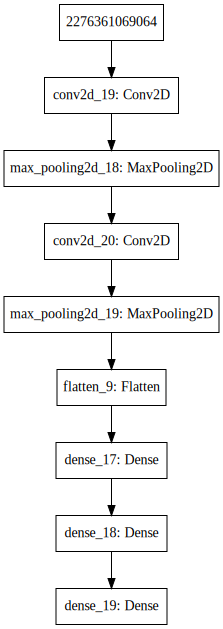

In [13]:
SVG(data=model_to_dot(saved_cnn_model).create(prog='dot',format='svg'))

In [15]:
# Saving the above image to file. Note that you must have installed and imported pydot
plot_model(model=saved_cnn_model,to_file='cnn_classifier_model.png')

In [21]:
saved_cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
__________

### Predictions

In [301]:
prediction = saved_cnn_model.predict_classes(new_image)

In [306]:
prediction

array([3], dtype=int64)

In [315]:
def showCarPicture(picture_path):
    the_img = plt.imread(picture_path)
    plt.imshow(the_img)
    plt.axis('off')
    plt.show()

In [317]:
def showPredictionDetails(pred_var):
    all_classes = [key for key in training_set_aug_images.class_indices]
    car_name = all_classes[pred_var[0]]
    print('The Car Image given is predicted to be a \'' + car_name + '\' Car')

## More Predictions

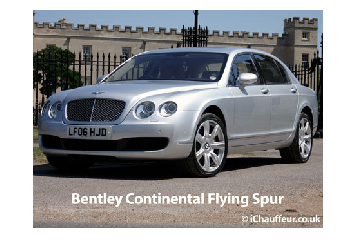

The Car Image given is predicted to be a 'Bentley' Car


In [318]:
showCarPicture(img_path)
showPredictionDetails(prediction)

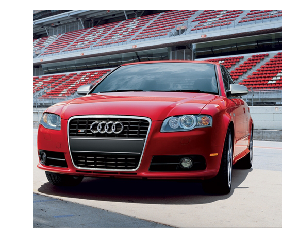

The Car Image given is predicted to be a 'Chevrolet' Car


In [321]:
# Getting the Image to predict
img_path = 'Datasets/StanfordCarsGroup/sub_validation_set/Audi/06565.jpg'     #Audi car
new_image = load_image(img_path)
prediction = saved_cnn_model.predict_classes(new_image)

showCarPicture(img_path)
showPredictionDetails(prediction)

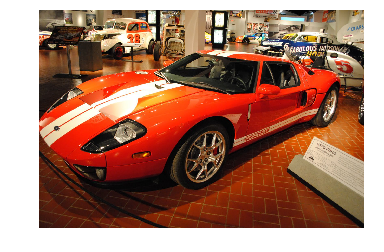

The Car Image given is predicted to be a 'Ford' Car


In [324]:
# Getting the Image to predict
img_path = 'Datasets/StanfordCarsGroup/sub_validation_set/Ford/06613.jpg'     #Ford car
new_image = load_image(img_path)
prediction = saved_cnn_model.predict_classes(new_image)

showCarPicture(img_path)
showPredictionDetails(prediction)

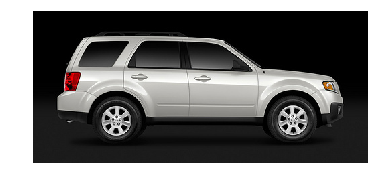

The Car Image given is predicted to be a 'Lamborghini' Car


In [325]:
# Getting the Image to predict
img_path = 'Datasets/StanfordCarsGroup/sub_validation_set/Mazda/07127.jpg'     #Mazda car
new_image = load_image(img_path)
prediction = saved_cnn_model.predict_classes(new_image)

showCarPicture(img_path)
showPredictionDetails(prediction)

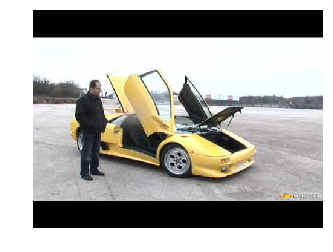

The Car Image given is predicted to be a 'Lamborghini' Car


In [326]:
# Getting the Image to predict
img_path = 'Datasets/StanfordCarsGroup/sub_validation_set/Lamborghini/06641.jpg'     #Lamborghini car
new_image = load_image(img_path)
prediction = saved_cnn_model.predict_classes(new_image)

showCarPicture(img_path)
showPredictionDetails(prediction)

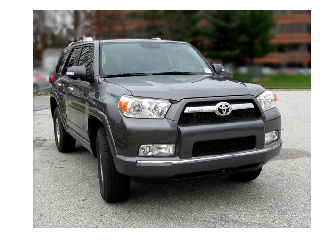

The Car Image given is predicted to be a 'Toyota' Car


In [329]:
# Getting the Image to predict
img_path = 'Datasets/StanfordCarsGroup/sub_validation_set/Toyota/06673.jpg'     #Toyota car
new_image = load_image(img_path)
prediction = saved_cnn_model.predict_classes(new_image)

showCarPicture(img_path)
showPredictionDetails(prediction)

# ================= THE END ====================